<a href="https://colab.research.google.com/github/catabia/indeed/blob/main/md_indeed_08_10_2021.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
from matplotlib import pyplot as plt
plt.style.use('ggplot')
from matplotlib.pyplot import figure
import seaborn as sns
import numpy as np
import math
from matplotlib import dates

Montgomery County:  https://dcwagelaw.com/montgomery-county-minimum-wage/

MD: https://www.dol.gov/agencies/whd/state/minimum-wage/history


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df = pd.read_csv("/content/drive/MyDrive/hannah_research/data/indeed_md_08_03_21.txt", sep='\t')
df.shape

(43813, 47)

In [ ]:
#pandas!
pd.set_option('display.max_rows', 500) 

#dates!
df['review_date'] = pd.to_datetime(df['review_date'])
df.set_index(pd.DatetimeIndex(df['review_date']))

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43813 entries, 0 to 43812
Data columns (total 47 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   platform              43813 non-null  object        
 1   scrape_company_num    43813 non-null  int64         
 2   date_scraped          43813 non-null  object        
 3   scrape_folder_name    43813 non-null  object        
 4   scrape_file_name      43813 non-null  object        
 5   base_url              43813 non-null  object        
 6   page_num              43813 non-null  int64         
 7   parent_company        43813 non-null  object        
 8   be_careful            43813 non-null  int64         
 9   company_name          43813 non-null  object        
 10  scraped_from_url      43813 non-null  object        
 11  empid                 43813 non-null  object        
 12  language              0 non-null      float64       
 13  id              

Text(0.5, 1.0, 'Reviews in IL')

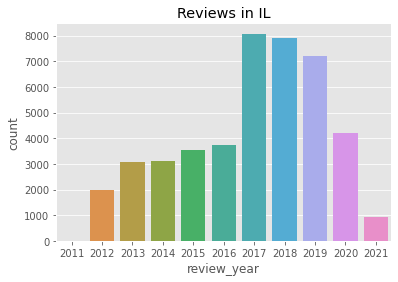

In [ ]:
sns.countplot(data=df, x='review_year')
plt.title("Reviews in IL")

In [ ]:

#df = df[df.be_careful!=1]

Text(0.5, 1.0, 'Reviews in OR')

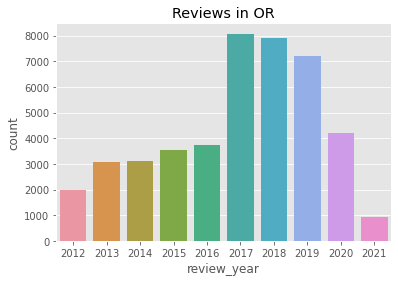

In [ ]:
# Cut off before 2012, after 2020

df = df[df.review_year>=2012]
#df = df[df.review_year<2021]
sns.countplot(data=df, x='review_year')
plt.title("Reviews in OR")

In [ ]:
districts = [ 'Ashton',
'Barnesville',
'Beallsville',
'Bethesda',
'Boyds',
'Brinklow',
'Brookeville',
'Burtonsville',
'Cabin John',
'Chevy Chase',
'Clarksburg',
'Damascus',
'Derwood',
'Dickerson',
'Gaithersburg',
'Garrett Park',
'Germantown',
'Glen Echo',
'Kensington',
'Montgomery Village',
'Olney',
'Poolesville',
'Potomac',
'Rockville',
'Sandy Spring',
'Silver Spring',
'Spencerville',
'Takoma Park',
'Washington Groves']

In [ ]:

df.count()

platform                43805
scrape_company_num      43805
date_scraped            43805
scrape_folder_name      43805
scrape_file_name        43805
base_url                43805
page_num                43805
parent_company          43805
be_careful              43805
company_name            43805
scraped_from_url        43805
empid                   43805
language                    0
id                      43805
review_url              43805
uid                     43805
review_date             43805
review_month            43805
review_day              43805
review_year             43805
parsable_loc            43805
state                   43805
city                    43805
country                 43805
location                43805
job_title               43801
norm_job_title          43644
current                 43805
length_of_employment        0
overall_rating          43805
work_life_rating        43805
compensation_rating     43805
job_security_rating     43805
management

In [ ]:
df['treat_loc'] = 0
df.loc[df.city.isin(districts),'treat_loc']= 1
df.treat_loc.sum()


4937

In [ ]:
df['month_year'] = pd.to_datetime(df['review_date']).dt.strftime('%Y-%m')

In [ ]:
df.review_date.min()

Timestamp('2012-01-02 00:00:00')

Total number of reviews: 43805
Total reviews in Portland: 4937


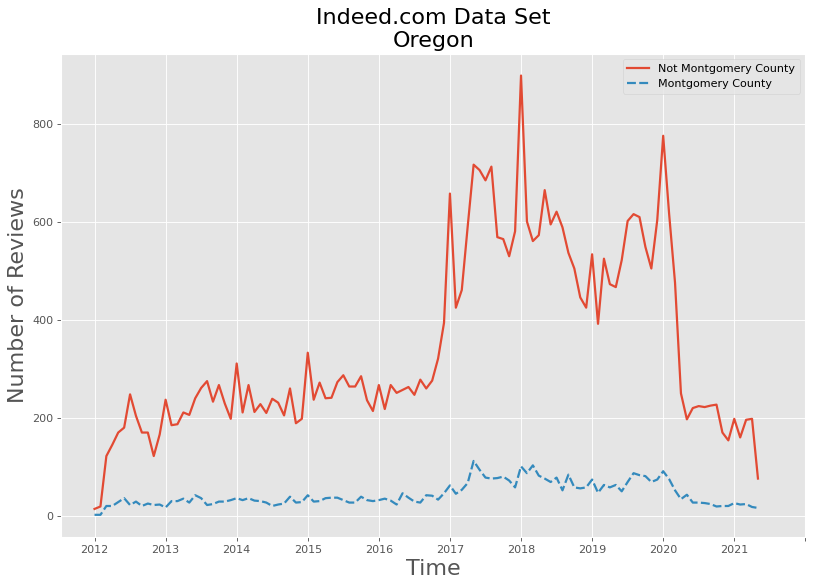

In [ ]:

print('Total number of reviews:', df.shape[0])
print('Total reviews in Portland:', df.treat_loc.sum())

data_viz = df[['month_year', 'treat_loc']]
data_viz = data_viz.groupby(['month_year', 'treat_loc']).size().reset_index(name='count')
#data_viz = data_viz.groupby(['review_year', 'seattle']).agg({'count'})

#print(data_viz)

figure(figsize=(12, 8), dpi=80)
sns.lineplot(data=data_viz, x='month_year', y='count', hue = 'treat_loc', linewidth=2, style = 'treat_loc')
plt.title("Indeed.com Data Set\nOregon", fontsize=20)
plt.xlabel('Time', fontsize=20)
plt.ylabel('Number of Reviews', fontsize=20)
#ticks, labels = plt.xticks()

plt.xticks(ticks=[0,12, 24, 36, 48, 60, 72, 84, 96, 108, 120], labels=[ '2012', '2013', '2014', '2015', '2016', '2017', '2018', '2019', '2020', '2021'])
plt.legend(['Not Montgomery County', 'Montgomery County'])


15191


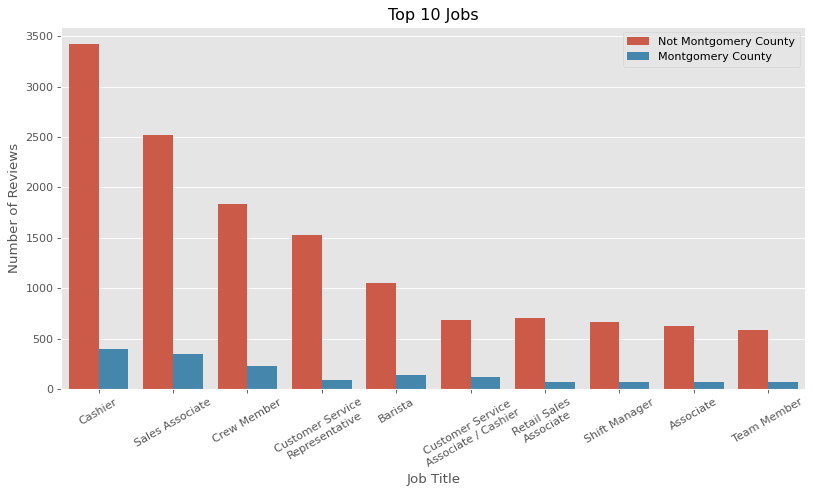

In [ ]:
figure(figsize=(12, 6), dpi=80)
top_jobs = df.norm_job_title.value_counts()[:10].index.tolist()
job_df = df[df.norm_job_title.isin(top_jobs)]
print(job_df.shape[0])
sns.countplot(data=job_df, x='norm_job_title', hue = 'treat_loc', order = top_jobs)
plt.title("Top 10 Jobs")
plt.xlabel('Job Title')
locs, labs = plt.xticks()
l= ['Cashier', 'Sales Associate', 'Crew Member', 'Customer Service\nRepresentative', 'Barista', 'Customer Service\nAssociate / Cashier', 'Retail Sales\nAssociate', 'Shift Manager', 'Associate', 'Team Member']
plt.xticks(ticks=locs, labels=l, rotation=30)
plt.ylabel('Number of Reviews')
plt.legend(['Not Montgomery County', 'Montgomery County'])

15191


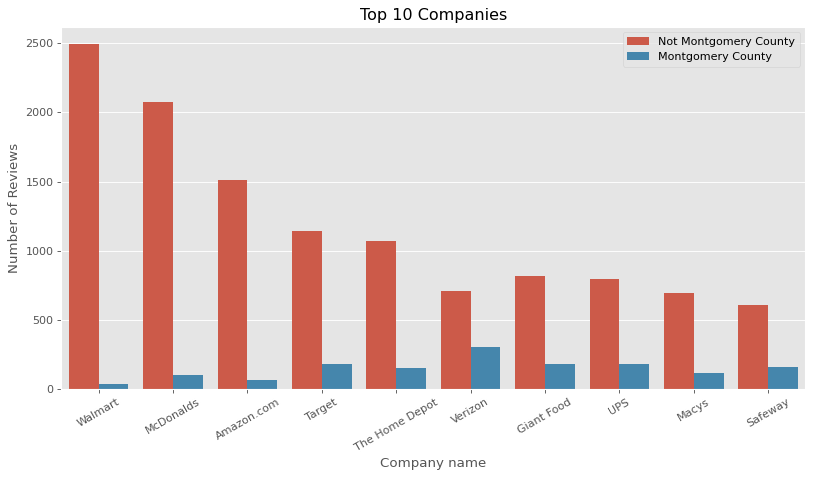

In [ ]:
figure(figsize=(12, 6), dpi=80)
top_comp = df.company_name.value_counts()[:10].index.tolist()
comp_df = df[df.company_name.isin(top_comp)]
print(job_df.shape[0])
sns.countplot(data=comp_df, x='company_name', hue = 'treat_loc', order = top_comp)
plt.title("Top 10 Companies")
plt.xlabel('Company name')
locs, labs = plt.xticks()
plt.xticks(rotation=30)
plt.ylabel('Number of Reviews')
plt.legend(['Not Montgomery County', 'Montgomery County'])

In [ ]:
comp = df.groupby(['month_year', 'treat_loc']).agg({'overall_rating':['mean', 'count']})
comp.columns = ['mean', 'count']
comp.reset_index(inplace=True)
comp

,month_year,treat_loc,mean,count
0,2012-01,0,3.357143,14
1,2012-01,1,4.500000,2
2,2012-02,0,4.210526,19
3,2012-02,1,4.000000,2
4,2012-03,0,3.713115,122
5,2012-03,1,4.350000,20
6,2012-04,0,3.820690,145
7,2012-04,1,3.750000,20
8,2012-05,0,3.694118,170
9,2012-05,1,3.571429,28


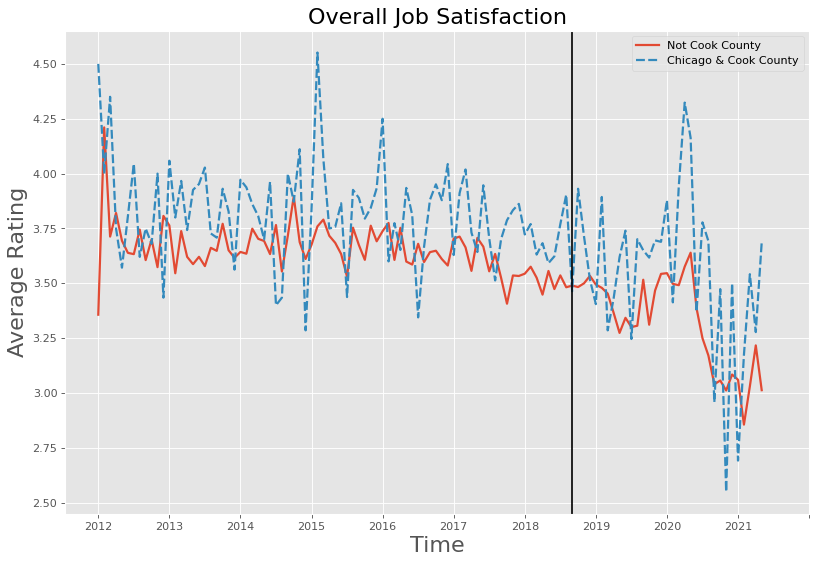

In [ ]:
figure(figsize=(12, 8), dpi=80)
sns.lineplot(data=comp, x='month_year', y='mean', hue = 'treat_loc', linewidth=2, style = 'treat_loc')
plt.title("Overall Job Satisfaction", fontsize=20)
plt.xlabel('Time', fontsize=20)
plt.ylabel('Average Rating', fontsize=20)
#ticks, labels = plt.xticks()

plt.xticks(ticks=[0,12, 24, 36, 48, 60, 72, 84, 96, 108, 120], labels=[ '2012', '2013', '2014', '2015', '2016', '2017', '2018', '2019', '2020', '2021'])
plt.legend(['Not Cook County', 'Chicago & Cook County'])
plt.axvline(x=80, color = 'black')

In [ ]:
f = df[df.company_name.isin(['Amazon.com', 'Walmart', 'McDonalds', 'Starbucks'])]
domp = f.groupby(['month_year', 'company_name']).agg({'overall_rating':['mean', 'count']})
domp.columns = ['mean', 'count']
domp.reset_index(inplace=True)
domp

,month_year,company_name,mean,count
0,2012-01,McDonalds,3.333333,3
1,2012-03,McDonalds,4.200000,5
2,2012-03,Walmart,3.111111,9
3,2012-04,McDonalds,3.500000,8
4,2012-04,Walmart,3.000000,12
5,2012-05,McDonalds,3.647059,17
6,2012-05,Walmart,3.272727,11
7,2012-06,McDonalds,3.272727,11
8,2012-06,Starbucks,5.000000,1
9,2012-06,Walmart,3.642857,14


([<matplotlib.axis.XTick at 0x7f19d327fa90>,
 [Text(0, 0, '2012'),
  Text(0, 0, '2013'),
  Text(0, 0, '2014'),
  Text(0, 0, '2015'),
  Text(0, 0, '2016'),
  Text(0, 0, '2017'),
  Text(0, 0, '2018'),
  Text(0, 0, '2019'),
  Text(0, 0, '2020'),
  Text(0, 0, '2021')])

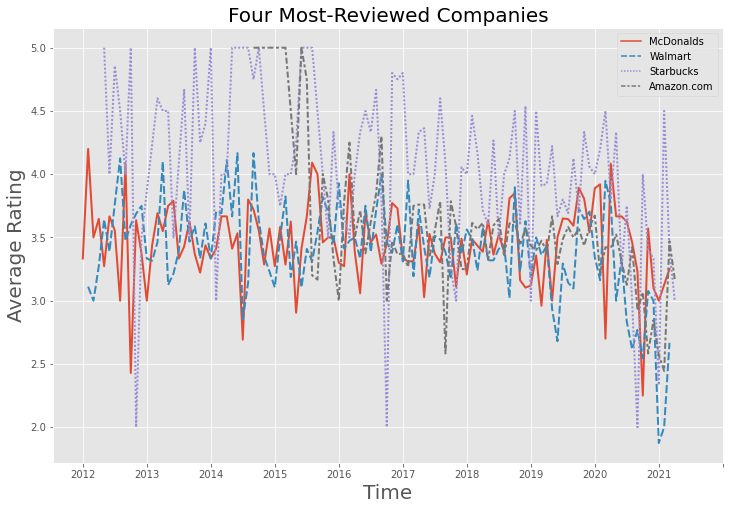

In [ ]:
### plt.clf()
fig, ax = plt.subplots(figsize=(12, 8))
sns.lineplot(data=domp, x='month_year', y='mean', hue='company_name',linewidth=2, style = 'company_name')
plt.title("Four Most-Reviewed Companies", fontsize=20)
plt.xlabel('Time', fontsize=20)
plt.ylabel('Average Rating', fontsize=20)
plt.legend(title='')
#ticks, labels = plt.xticks()

plt.xticks(ticks=[0,12, 24, 36, 48, 60, 72, 84, 96, 108, 120], labels=[ '2012', '2013', '2014', '2015', '2016', '2017', '2018', '2019', '2020', '2021'])
#plt.legend(['Not Seattle', 'Seattle'])

In [ ]:
df2 = df[df.compensation_rating!=0]
print(df2.shape[0])
comp = df2.groupby(['review_year', 'treat_loc']).agg({'compensation_rating':['mean', 'count']})
comp.columns = ['mean', 'count']
comp.reset_index(inplace=True)
comp

40055


,review_year,treat_loc,mean,count
0,2012,0,3.312375,1495
1,2012,1,3.434978,223
2,2013,0,3.215040,2367
3,2013,1,3.483333,300
4,2014,0,3.228512,2385
5,2014,1,3.392283,311
6,2015,0,3.247183,2751
7,2015,1,3.508571,350
8,2016,0,3.279292,2936
9,2016,1,3.481959,388


(2.8, 3.8)

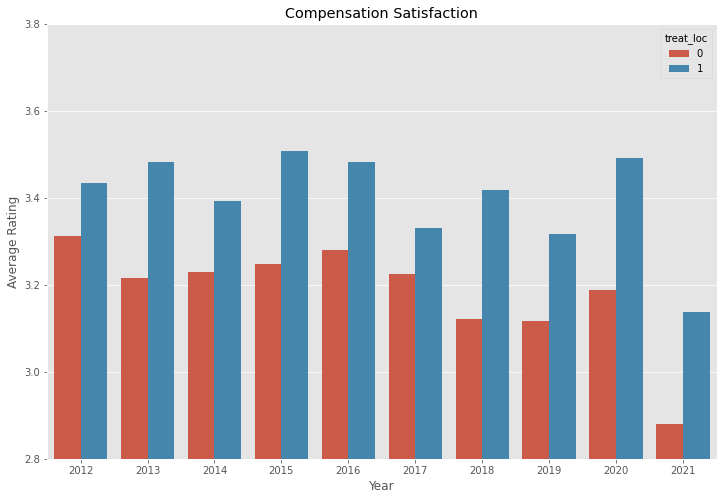

In [ ]:
fig, ax = plt.subplots(figsize=(12, 8))
sns.barplot(data=comp, x='review_year', y='mean', hue='treat_loc')


plt.title("Compensation Satisfaction")
plt.xlabel('Year')
plt.ylabel('Average Rating')
#plt.legend(['Not Seattle', 'Seattle'])
plt.ylim(2.8, 3.8)

In [ ]:
# create output for R
df['post'] = 0
# different treatment times for Chicago and Cook
mask = (df['review_date']>='07/01/2018')

df.post[mask]=1

print(df.treat_loc)

df['month_year'] = pd.to_datetime(df['review_date']).dt.to_period('M')

rdf = df[['overall_rating', 'work_life_rating', 'compensation_rating', 'job_security_rating',
          'management_rating', 'culture_rating', 'post', 'treat_loc', 'review_year', 
          'company_name', 'norm_job_title', 'review_date', 'city', 'month_year']]
rdf.to_csv('/content/drive/MyDrive/hannah_research/data/md_rdf.csv', index=False)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


0        0
1        0
2        0
3        1
4        0
        ..
43808    0
43809    0
43810    0
43811    0
43812    1
Name: treat_loc, Length: 43805, dtype: int64
